## Цель: 

### Найти похожие между собой страны и регионы
----

## Импорт библиотек и загрузка данных

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Исследование данных (Exploratory Data Analysis)


In [76]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Визуализация данных

**Построим гистограмму для колонки Population.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

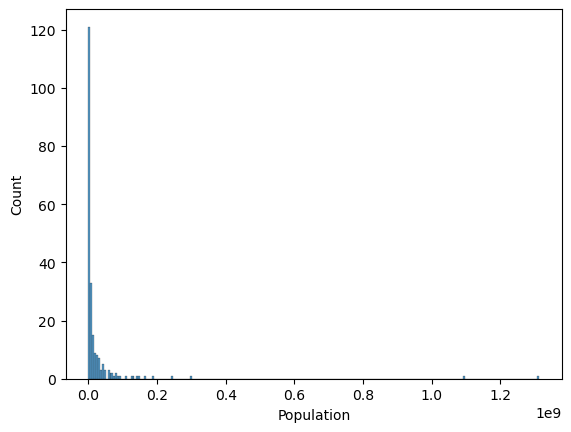

In [79]:
sns.histplot(data = df, x = 'Population')

**Мы заметили, что гистограмма очень перекошена из-за нескольких очень больших стран. Поменяем график таким образом, чтобы показывать только страны с населением меньше 0.5 миллиарда людей.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

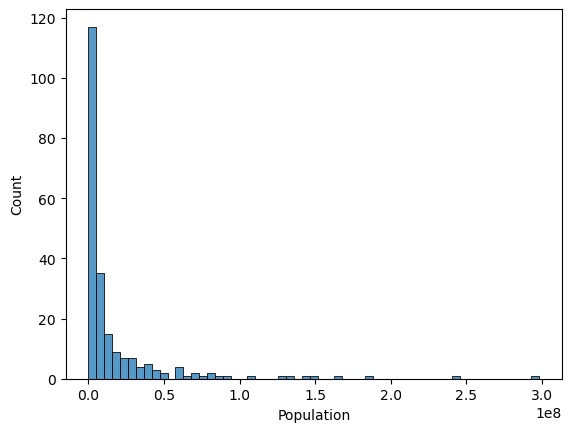

In [80]:
sns.histplot(data = df[df['Population'] < 0.5 * 10**9], x = 'Population')

**Далее исследуем GDP (ВВП - Валовый Внутренний Продукт) и регионы (Regions). Построим график barchart, на котором изобразитм среднее ВВП на душу населения (GDP per Capita) для каждого региона.**

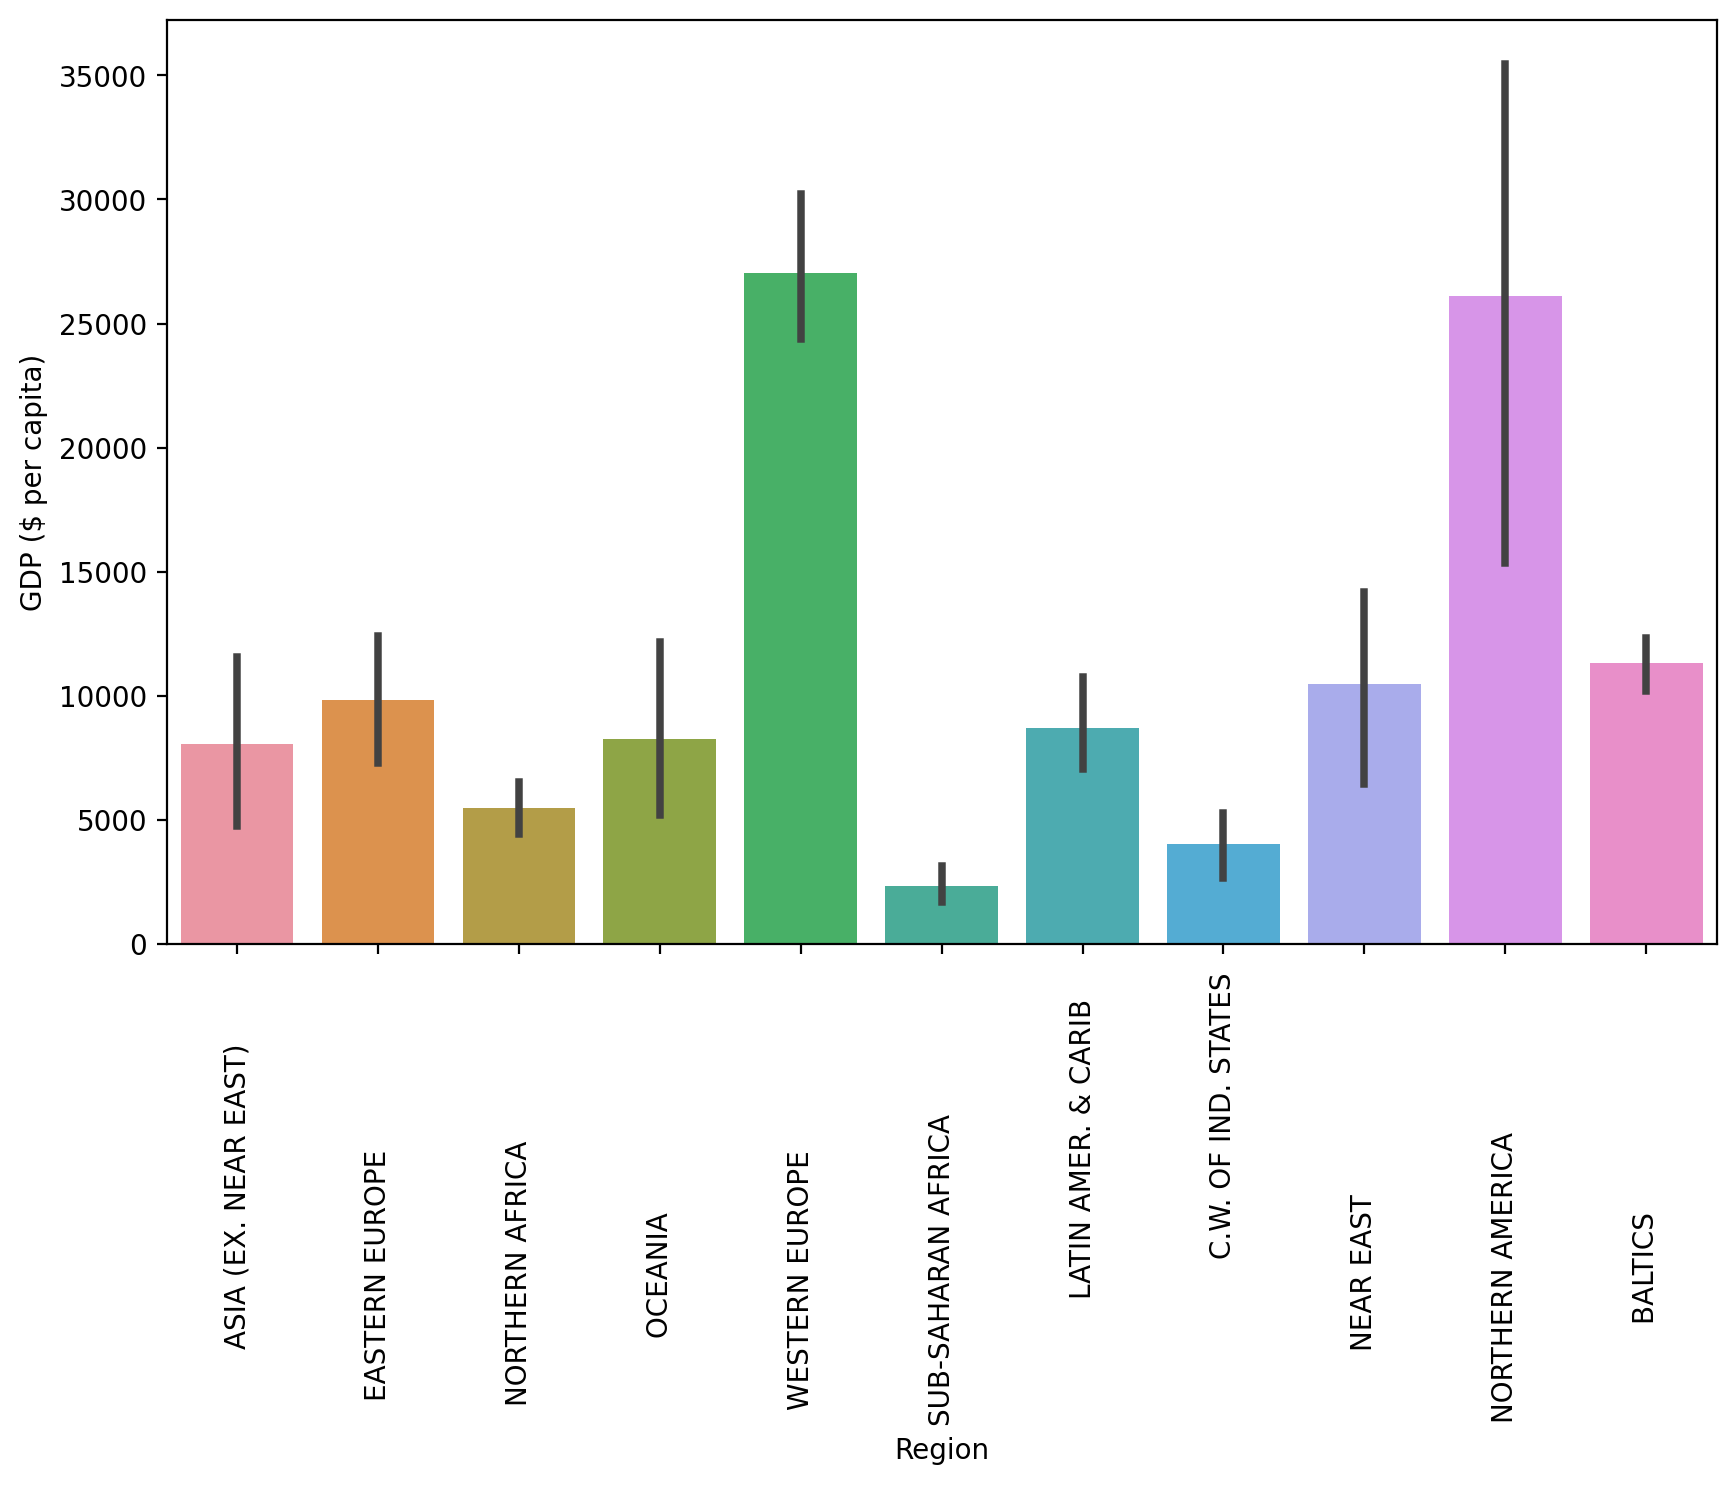

In [81]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

**Построим график scatterplot для визуализации связи между колонками "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения".**

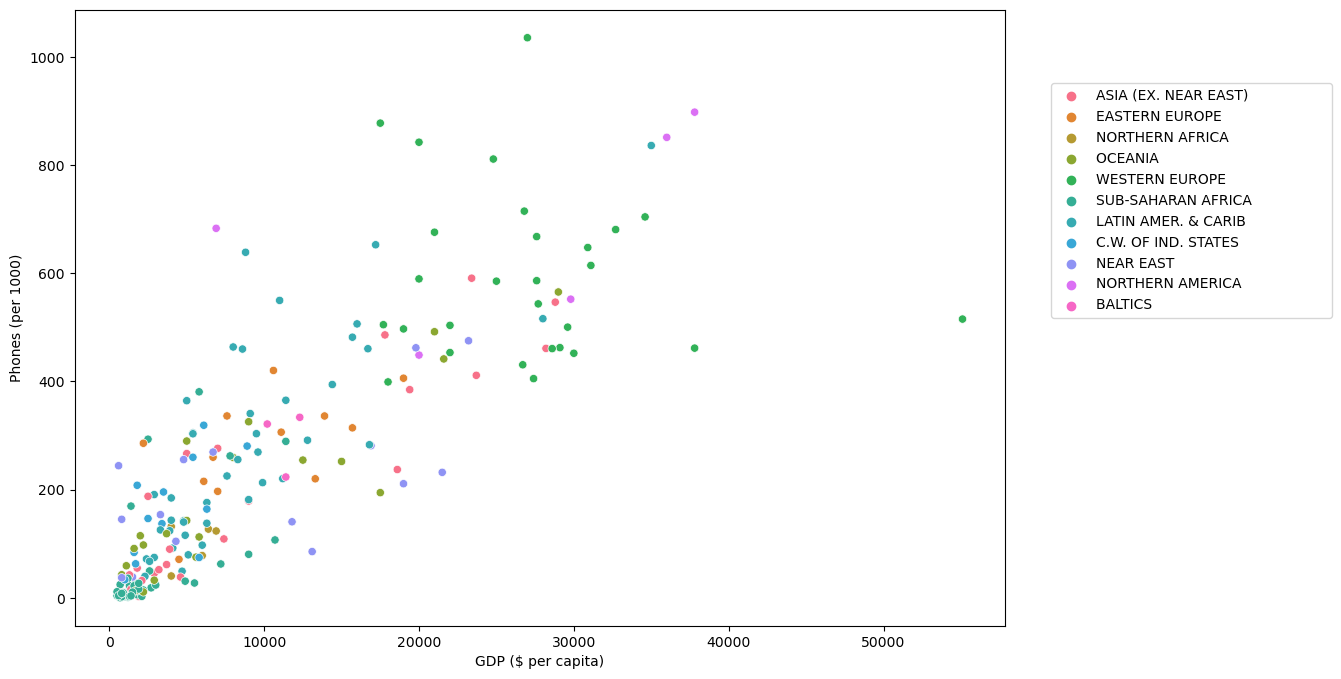

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Phones (per 1000)', hue = 'Region')
plt.legend(loc=(1.05,0.5))

**Построим график scatterplot для колонок "GDP per Capita" и "Literacy". Какие выводы можно сделать из этого графика?**

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

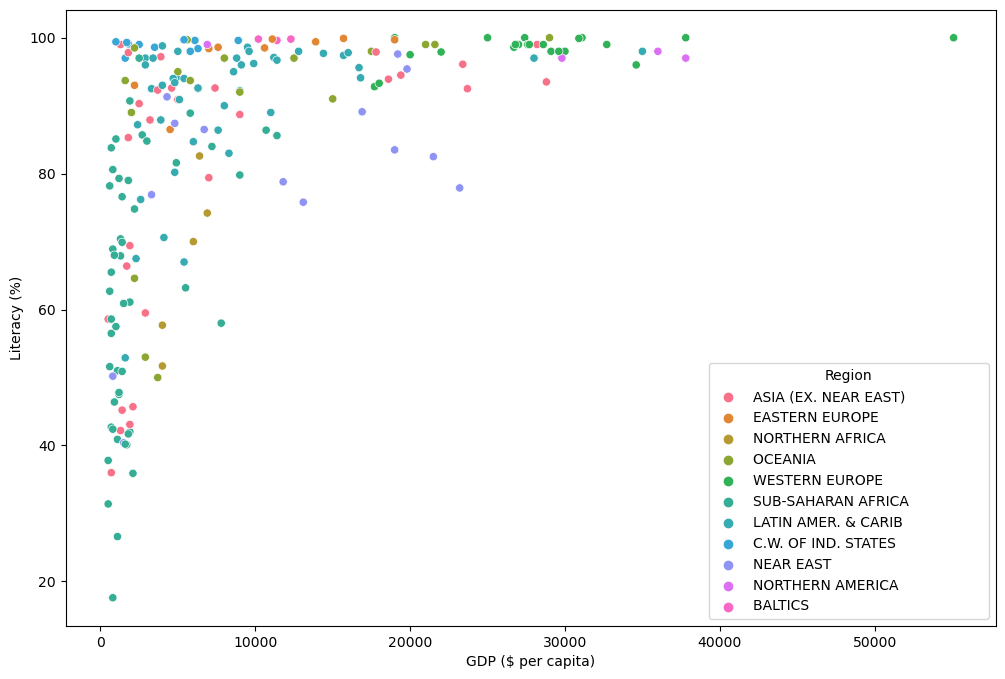

In [83]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Literacy (%)', hue = 'Region')

**Видим, что без увеличения уровня грамотности роста показателя ВВП на душу населения не добиться, но даже грамотное население не является гарантом благосостояния**

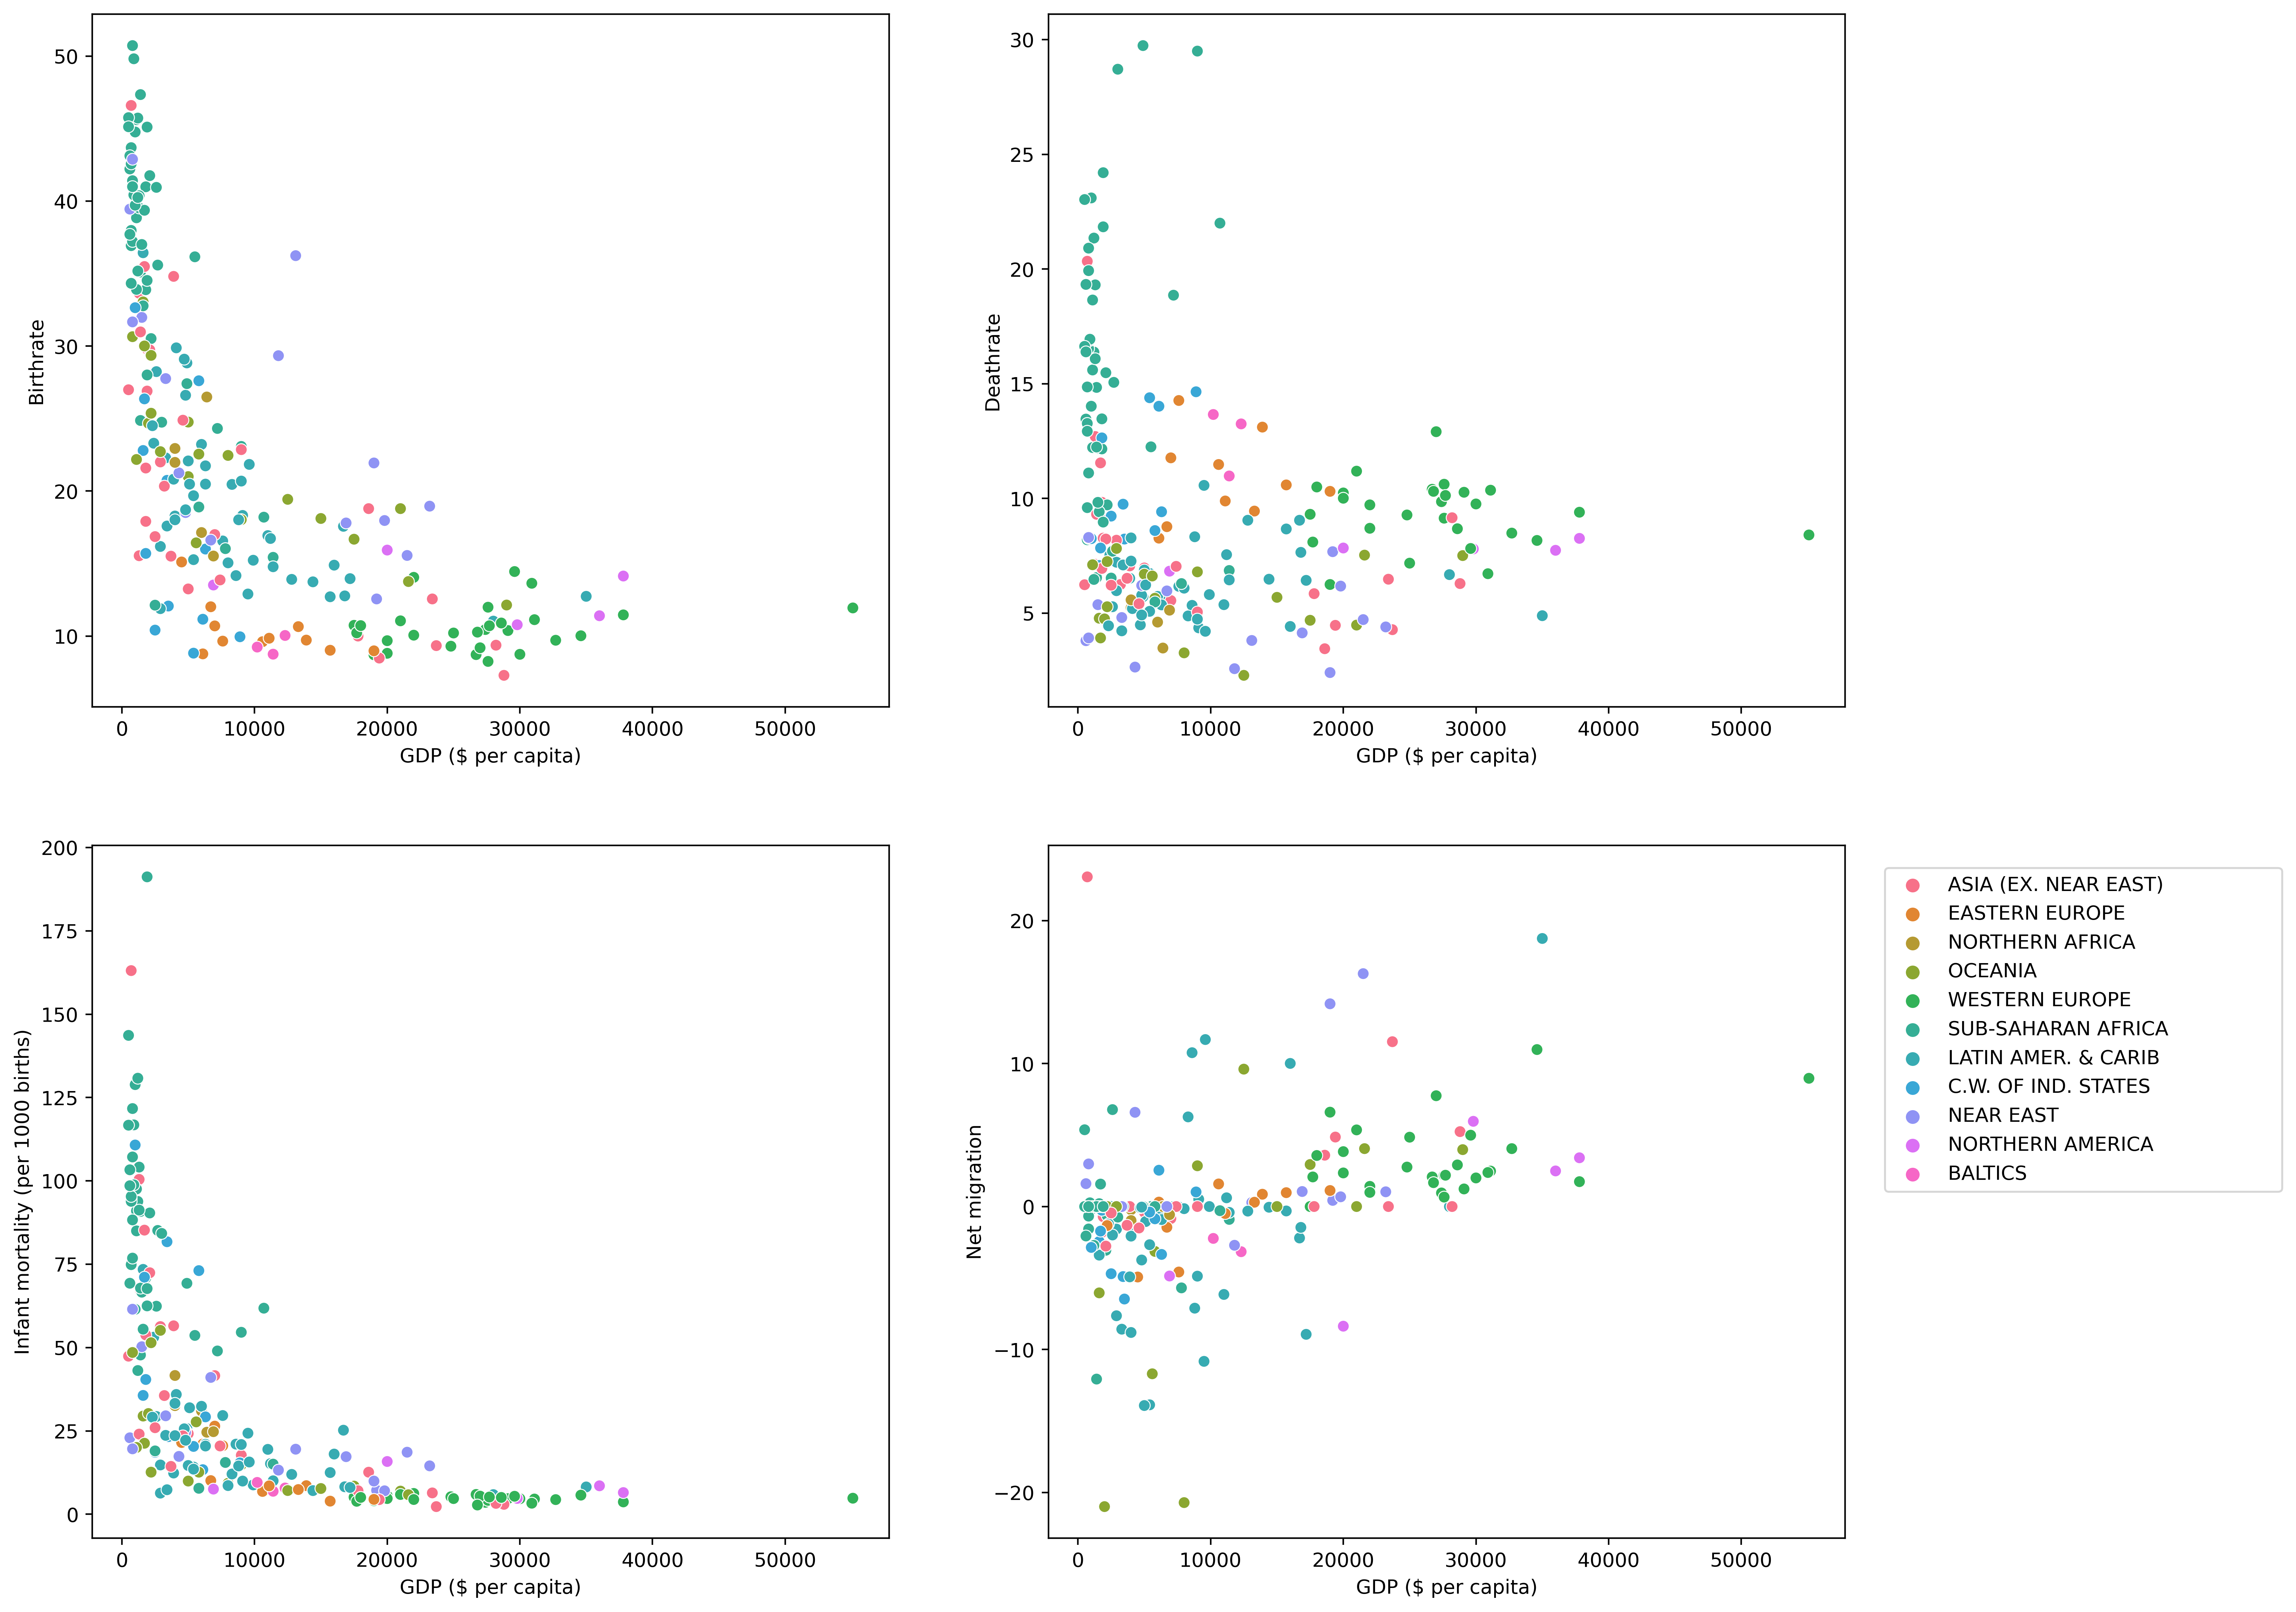

In [84]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 14), dpi = 400 )

sns.scatterplot(ax = ax[0,0], data = df, x = 'GDP ($ per capita)', y = 'Birthrate', hue = 'Region', legend = False)
sns.scatterplot(ax = ax[0, 1], data = df, x = 'GDP ($ per capita)', y = 'Deathrate', hue = 'Region', legend = False)
sns.scatterplot(ax = ax[1, 0], data = df, x = 'GDP ($ per capita)', y = 'Infant mortality (per 1000 births)',
                hue = 'Region', legend = False)
sns.scatterplot(ax = ax[1, 1], data = df, x = 'GDP ($ per capita)', y = 'Net migration', hue = 'Region')
plt.legend(loc=(1.05,0.5))

**Здесь мы можем увидеть последствия второго демографического перехода в странах с высоким ВВП на душу населения, резкое падение детской смертности при росте ВВП и ситуацию с чистой миграцией по регионам.**

**Построим тепловую карту Heatmap для корреляций между колонками в датафрейме.**

<AxesSubplot:>

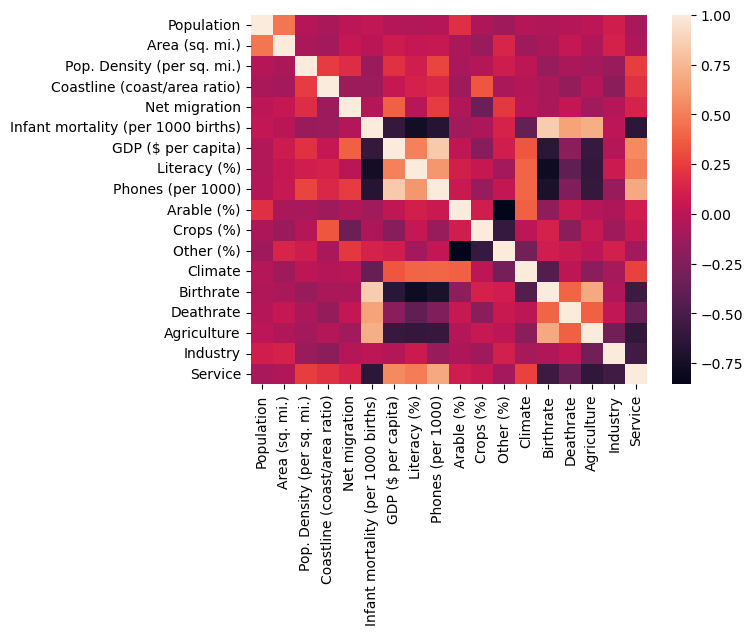

In [85]:
sns.heatmap(data = df.corr())

**Построим график clustermap для корреляций между колонками датафрейма.**

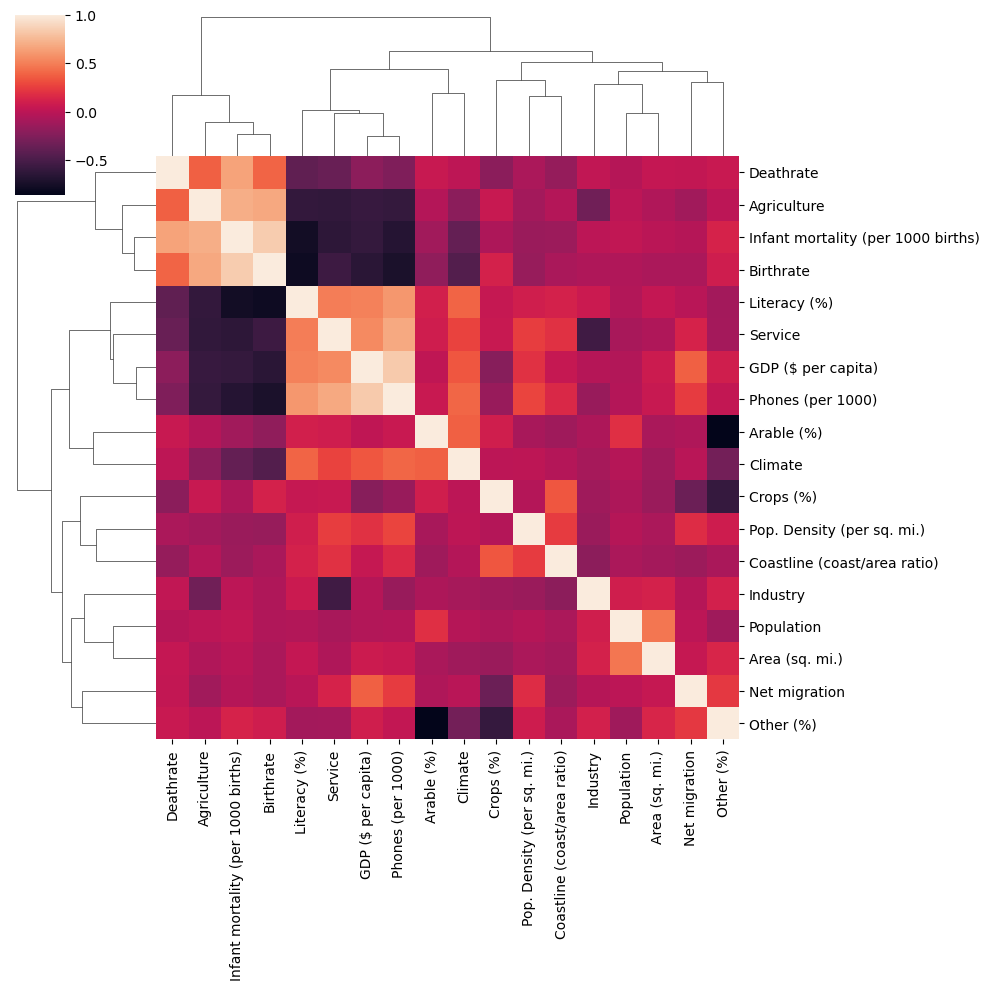

In [86]:
sns.clustermap(data = df.corr())

-----

## Подготовка данных и модель данных

Давайте подготовим наши данные для кластеризации с помощью метода К-средних!

### Отсутствующие данные (Missing Data)

**Построим отчёт - сколько строк имеют отсутствующие значения в той или иной колонке.**

In [87]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Для каких стран в колонке Agriculture значения NaN? Что эти страны имеют общего между собой?**

In [88]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Большинство этих стран являются маленькими островами, кроме Гренландии и Западной Сахары. Заменим для этих стран отсутствующие значения нулями**
    

In [89]:
# Напишите Ваш код в этой ячейке
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [90]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Колонка "climate" пустая для нескольких стран. Но для всех стран заполнена колонка Region! Пользуясь этим, заменим отсутствующие значения колонки Climate на средние значения этой колонки, где усреднение выполняется для соответствующего региона.**

In [91]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [92]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Для колонки "Literacy percentage" применим такой же метод, что и ранее для колонки Climate. Заменим отсутствующие значения колонки Literacy % на средние значения этой колонки для соответствующего региона.**

In [93]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].\
                                                                    transform('mean'))
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [94]:
df[df.isnull().any(axis = 1)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.000000,289.9,17.39,13.04,69.57,2.000000,21.00,NaN,0.151,0.096,0.753
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.600000,NaN,7.79,4.44,87.77,3.000000,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.600000,NaN,4.71,0.67,94.62,2.000000,26.99,6.24,0.085,0.231,0.684
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,94.291667,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,99.000000,1035.6,0.00,0.00,100.00,2.826087,9.19,12.91,0.170,NaN,NaN
181,Serbia,EASTERN EUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.000000,285.8,33.35,3.20,63.45,3.111111,NaN,NaN,0.166,0.255,0.579


**Разумным решением станет удаление Островов Кука, Монако и Гернси, из-за большого количества пропущенных значений и малого их размера**

In [95]:
df.drop(labels = [47, 85, 138], axis = 0, inplace = True)


In [96]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             1
Deathrate                             1
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Далее выведем несколько стран для сравнения. Румыния и Хорватия с точки зрения демографии и географии близки к Сербии, Кипр же по уровню благосостояния ближе к странам Западной Европы(особенно Испании), Восточный Тимор же вполне сравним с Афганистаном и Бурунди. Основываясь на этих сравнениях заполним пропущенные значения**

In [97]:
df.loc[df['Country'].isin(['Croatia', 'Romania', 'Germany', 'United Kingdom', 'Spain', 'Afghanistan', 'Burundi'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.000000,46.60,20.34,0.380,0.240,0.380
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,290.7,0.00,-0.06,69.29,600.0,51.6,3.4,35.05,14.02,50.93,2.000000,42.22,13.46,0.463,0.203,0.334
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,3.111111,9.61,11.48,0.070,0.308,0.622
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,667.9,33.85,0.59,65.56,3.000000,8.25,10.62,0.009,0.296,0.695
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.000000,10.70,11.77,0.101,0.350,0.549
190,Spain,WESTERN EUROPE,40397842,504782,80.0,0.98,0.99,4.42,22000.0,97.9,453.5,26.07,9.87,64.06,3.000000,10.06,9.72,0.040,0.295,0.665
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.000000,10.71,10.13,0.005,0.237,0.758


**Заполняем Phones (per 1000) для Кипра и Восточного Тимора**

In [98]:
df[(df['Phones (per 1000)'].isnull()) & (df['Country'] == 'Cyprus')] = df[df['Phones (per 1000)'].isnull()].fillna(453.5)

In [99]:
df[(df['Phones (per 1000)'].isnull())] = df[df['Phones (per 1000)'].isnull()].fillna(3)

**Заполняем пропущенные значения для Сербии**

In [100]:
df[(df['Birthrate'].isnull())] = df[df['Birthrate'].isnull()].fillna(10)
df[(df['Deathrate'].isnull())] = df[df['Deathrate'].isnull()].fillna(11.5)

In [101]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## Подготовка данных с признаками

**Пришло время подготовить данные для кластеризации. Колонка Country является уникальным идентификатором, поэтому эта колонка не будет полезной для кластеризации.**

In [102]:
X = df.drop('Country', axis = 1)

**Создадим набор признаков X, причём колонка Region всё ещё является категориальной, поэтому для этой колонки создадим дамми-переменные с помощью Pandas.**

In [103]:
X = pd.get_dummies(X)

In [104]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


### Масштабирование данных

**Поскольку некоторые колонки измеряются в процентах, а некоторые в абсолютных значениях, то выполним масштабирование признаков.**

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Создание и обучение модели Kmeans




**Напишем цикл for для создания и обучения нескольких моделей KMeans, проверяя количество кластеров K от 2 до 30. На каждом шаге цикла сохраняем сумму квадратов расстояний от точек до центров кластеров (SSD - Sum of Squared Distances) для каждого значения K. Далее нанесём эти данные на график, изображая метрику SSD для различных значений К.Также можно построить график barplot с изменениями метрики SSD.**

In [106]:
from sklearn.cluster import KMeans

In [107]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)

    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

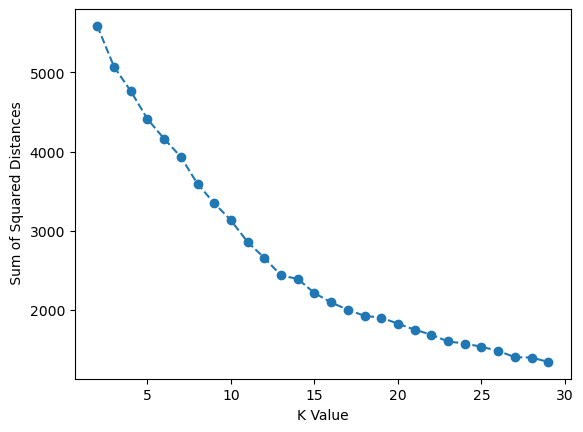

In [108]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

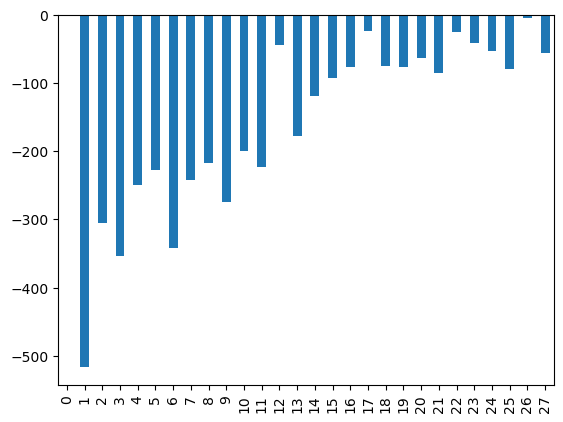

In [109]:
pd.Series(ssd).diff().plot(kind='bar')

# Интерпретация модели

-----


#### Выбираем K=3

**Можно сказать, что в точке K=3 падение метрики SSD более плавное (хотя метрика продолжает уменьшаться после этой точки). Как может выглядеть картина для K=3? Давайте посмотрим, какие признаки являются важными в случае 3 кластеров!**

In [121]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)
clusters = pd.Series(model.predict(scaled_X))
clusters

0      0
1      2
2      2
3      2
4      1
      ..
219    2
220    2
221    2
222    0
223    0
Length: 224, dtype: int32

In [126]:
X['K=3 Clusters'] = model.labels_
X.corr()['K=3 Clusters'].sort_values()

Deathrate                                    -0.754330
Region_SUB-SAHARAN AFRICA                    -0.727276
Infant mortality (per 1000 births)           -0.553734
Birthrate                                    -0.433204
Agriculture                                  -0.379321
Net migration                                -0.232859
Region_WESTERN EUROPE                        -0.131085
Climate                                      -0.078349
Region_EASTERN EUROPE                        -0.061348
Arable (%)                                   -0.057291
Region_BALTICS                               -0.042147
Other (%)                                    -0.033174
Area (sq. mi.)                               -0.016853
Pop. Density (per sq. mi.)                   -0.014587
GDP ($ per capita)                            0.006752
Region_NORTHERN AMERICA                       0.020686
Industry                                      0.030719
Population                                    0.080200
Region_ASI

------------
-------------

## Географическая интерпретация модели

**Далее я получу таблицу не только с названиями стран и соответствующими кластерами и их кодами ISO** 

In [123]:
country_clusters = pd.concat([df.reset_index().drop('index', axis = 1), clusters], axis = 1)
country_clusters.rename({0: 'Cluster'}, axis = 1, inplace= True)

In [129]:
codes = pd.read_csv("country_iso_codes.csv")
final_df = pd.merge(codes, country_clusters, how = 'inner')[['Country', 'ISO Code', 'Cluster']]
final_df

,Country,ISO Code,Cluster
0,Afghanistan,AFG,0
1,Albania,ALB,2
2,Algeria,DZA,2
3,American Samoa,ASM,2
4,Andorra,AND,1
...,...,...,...
182,"Congo, Dem. Rep.",COD,0
183,"Congo, Repub. of the",COG,0
184,Tanzania,TZA,0
185,Central African Rep.,CAF,0


**Создадим визуализацию**

In [125]:
import plotly.express as px

fig = px.choropleth(final_df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.ice)
fig.show()

**В целом Кластеры выглядят весьма логично** 